In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape


(60000, 28, 28)

In [4]:
X_test.shape


(10000, 28, 28)

In [5]:
single_image= X_train[0]


In [6]:
single_image.shape


(28, 28)

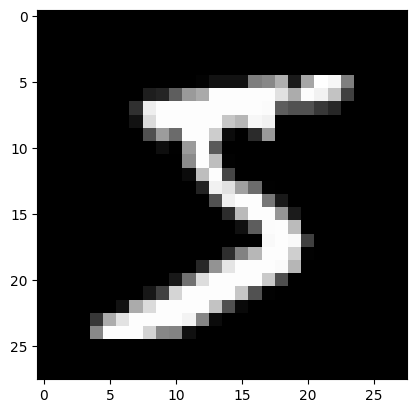

In [7]:
plt.imshow(single_image,cmap='gray')


In [8]:
y_train.shape


(60000,)

In [9]:
X_train.min()


0

In [10]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [11]:
X_train_scaled.min()


0.0

In [12]:
X_train_scaled.max()


1.0

In [13]:
y_train[0]


5

In [14]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [15]:
type(y_train_onehot)

numpy.ndarray

In [16]:
y_train_onehot.shape


(60000, 10)

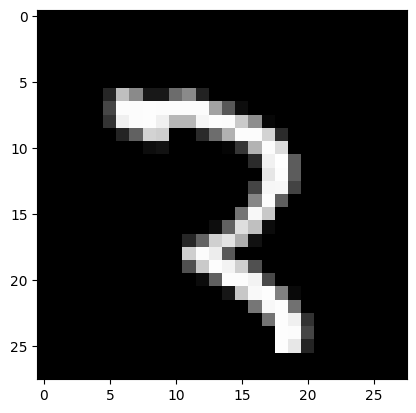

In [17]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')


In [18]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [19]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [20]:

model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(32))
model.add(layers.Dense(10,activation="softmax"))


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                        

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')


In [23]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
938/938 [==============================] - 35s 36ms/step - loss: 0.1895 - accuracy: 0.9446 - val_loss: 0.0728 - val_accuracy: 0.9768
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0607 - accuracy: 0.9817 - val_loss: 0.0524 - val_accuracy: 0.9821
Epoch 3/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0507 - val_accuracy: 0.9842
Epoch 4/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0298 - accuracy: 0.9908 - val_loss: 0.0479 - val_accuracy: 0.9847
Epoch 5/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.0416 - val_accuracy: 0.9863


In [24]:
metrics = pd.DataFrame(model.history.history)


In [25]:
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.189533,0.944567,0.072827,0.9768
1,0.060693,0.981700,0.052367,0.9821
2,0.040432,0.987433,0.050745,0.9842
3,0.029763,0.990783,0.047913,0.9847
4,0.021648,0.993500,0.041634,0.9863


<Axes: >

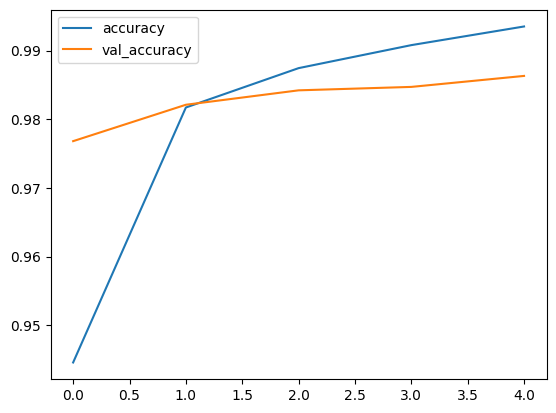

In [26]:
metrics[['accuracy','val_accuracy']].plot()


<Axes: >

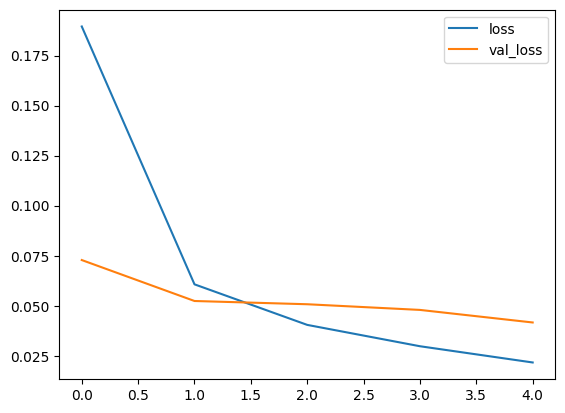

In [27]:
metrics[['loss','val_loss']].plot()


In [28]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 6ms/step


In [29]:
print(confusion_matrix(y_test,x_test_predictions))


[[ 976    0    2    0    0    1    0    1    0    0]
 [   0 1130    3    0    0    0    1    0    1    0]
 [   0    1 1024    0    0    0    1    5    0    1]
 [   0    0    1 1002    0    3    0    0    4    0]
 [   0    0    2    0  966    0    7    0    1    6]
 [   2    0    1    7    0  877    4    0    0    1]
 [   6    2    1    0    1    4  942    0    2    0]
 [   0    2   10    1    0    0    0 1008    1    6]
 [   4    1    6    0    0    1    1    2  956    3]
 [   0    4    0    3    7    4    0    4    5  982]]


In [30]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [59]:
img = image.load_img('1.jpg')


In [60]:
type(img)


PIL.JpegImagePlugin.JpegImageFile

In [61]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [62]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 27ms/step


In [64]:
print(x_single_prediction)


[4]


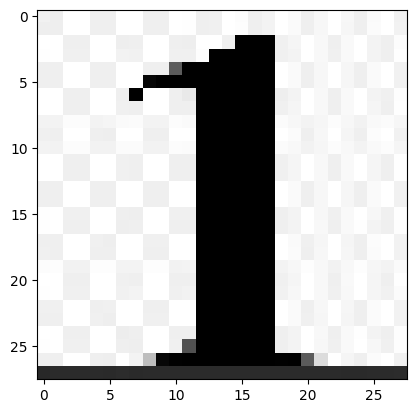

In [65]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [66]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [67]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [68]:
print(x_single_prediction)


[3]


In [69]:
img1 = image.load_img('9.jpg')


In [70]:
img_tensor = tf.convert_to_tensor(np.asarray(img1))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [71]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 23ms/step


In [72]:
print(x_single_prediction)


[3]


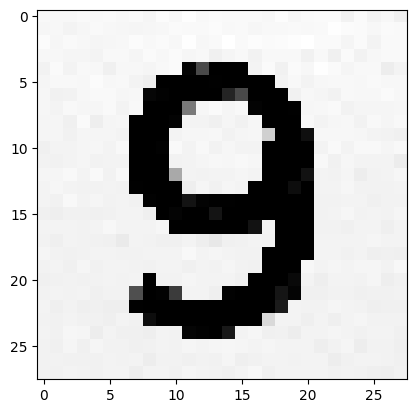

In [73]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [74]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [75]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 26ms/step


In [76]:
print(x_single_prediction)


[9]
